In [ ]:
import torch
import torchvision.transforms as transforms
import torchvision

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download = True, transform = transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 8, shuffle = True, num_workers = 2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [ ]:
import torch.nn.functional as F

class ConvNet(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = torch.nn.Conv2d(in_channels = 3, out_channels = 16, kernel_size = 3)
    self.pool1 = torch.nn.MaxPool2d(2,2)

    self.conv2 = torch.nn.Conv2d(in_channels = 16, out_channels = 32, kernel_size = 3)
    self.pool2 = torch.nn.MaxPool2d(2,2)

    self.flatten = torch.nn.Flatten()

    self.fc1 = torch.nn.Linear(in_features = 1152, out_features = 500)
    self.fc2 = torch.nn.Linear(in_features = 500, out_features = 100)

    self.out = torch.nn.Linear(in_features = 100, out_features = 10)

  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool1(x)

    x = F.relu(self.conv2(x))
    x = self.pool2(x)

    x = self.flatten(x)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))

    x = self.out(x)

    return x

In [ ]:
model = ConvNet().to('cuda')


for images, labels in train_loader:
  print(images.shape)
  print(labels.shape)
  print(model(images.to('cuda')).shape)

  break

torch.Size([8, 3, 32, 32])
torch.Size([8])
torch.Size([8, 10])


In [ ]:
#how many parameters in the network

num_params = 0

for x in model.parameters():
  num_params += len(torch.flatten(x))

print(f'{num_params:,} parameters')

632,698 parameters


In [ ]:
import torch.optim as optim

criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)


In [ ]:
for epoch in range (10):
  running_loss = 0.0
  running_accuracy = 0.0
  model.train(True)

  for i, data in enumerate(train_loader):
    inputs, labels = data
    inputs = inputs.to('cuda')
    labels = labels.to('cuda')

    optimizer.zero_grad()

    outputs = model(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    correct = torch.sum(torch.argmax(outputs, dim=1) == labels).item()
    running_accuracy += correct / 8
    if i % 2000 == 1999:
      print(f'[{epoch+1}, {i+1:5d}] loss: {running_loss/2000:.3f} accuracy: {(running_accuracy/2000)*100:.3f}%')
      running_loss = 0.0
      running_accuracy = 0.0
with (open('model.pt', 'wb')) as f:
  torch.save(model.state_dict(), f)

print('Finished Training')



[1,  2000] loss: 1.666 accuracy: 38.588%
[1,  4000] loss: 1.336 accuracy: 51.731%
[1,  6000] loss: 1.220 accuracy: 56.394%
[2,  2000] loss: 1.081 accuracy: 61.369%
[2,  4000] loss: 1.038 accuracy: 63.925%
[2,  6000] loss: 0.998 accuracy: 64.688%
[3,  2000] loss: 0.878 accuracy: 68.881%
[3,  4000] loss: 0.870 accuracy: 69.331%
[3,  6000] loss: 0.865 accuracy: 69.919%
[4,  2000] loss: 0.727 accuracy: 74.450%
[4,  4000] loss: 0.741 accuracy: 73.975%
[4,  6000] loss: 0.760 accuracy: 73.600%
[5,  2000] loss: 0.609 accuracy: 78.600%
[5,  4000] loss: 0.633 accuracy: 77.594%
[5,  6000] loss: 0.654 accuracy: 77.200%
[6,  2000] loss: 0.498 accuracy: 82.156%
[6,  4000] loss: 0.539 accuracy: 81.250%
[6,  6000] loss: 0.582 accuracy: 79.706%
[7,  2000] loss: 0.415 accuracy: 85.456%
[7,  4000] loss: 0.466 accuracy: 83.662%
[7,  6000] loss: 0.507 accuracy: 82.394%
[8,  2000] loss: 0.337 accuracy: 87.956%
[8,  4000] loss: 0.406 accuracy: 85.431%
[8,  6000] loss: 0.422 accuracy: 84.913%
[9,  2000] loss:

In [ ]:
with (open('model.pt', 'wb')) as f:
  torch.save(model.state_dict(), f)

In [ ]:
model.load_state_dict(torch.load('model.pt', weights_only = True))
model.eval()

ConvNet(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=1152, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=100, bias=True)
  (out): Linear(in_features=100, out_features=10, bias=True)
)

In [ ]:
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, download = True, transform = transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 8, shuffle = True, num_workers = 2)

Files already downloaded and verified


Batch 1:
---------------------------------------------
Correct Answer: ship | Predicted: deer


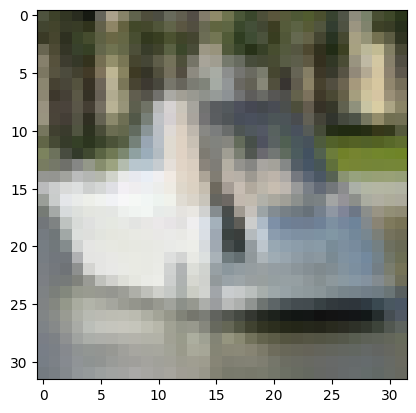


Correct Answer: dog | Predicted: cat


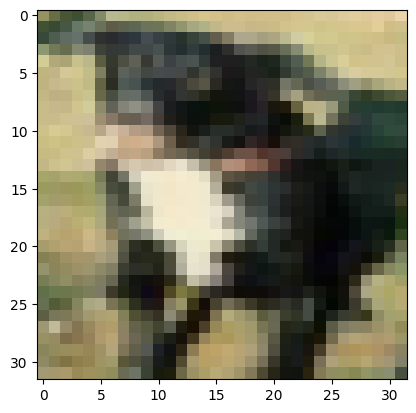


Correct Answer: car | Predicted: car


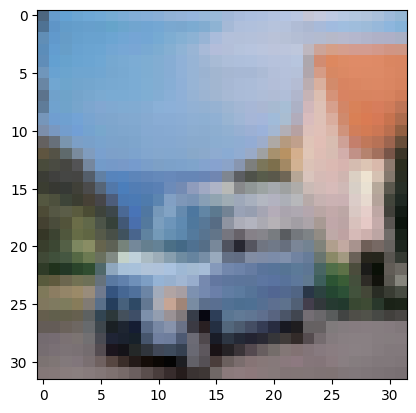


Correct Answer: car | Predicted: truck


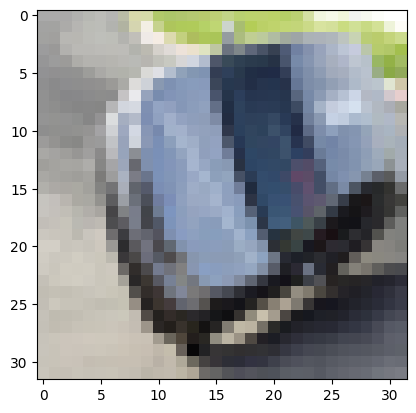


Correct Answer: dog | Predicted: dog


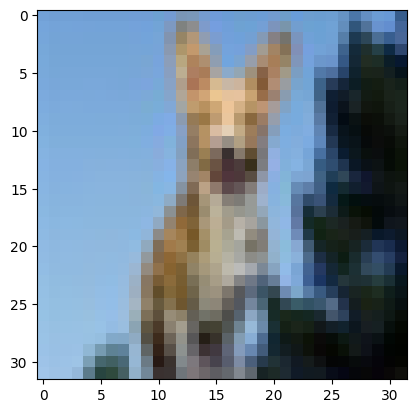


Correct Answer: deer | Predicted: plane


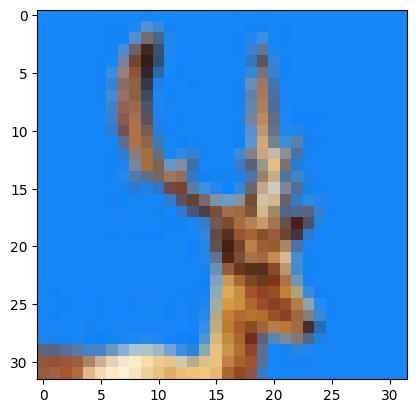


Correct Answer: frog | Predicted: frog


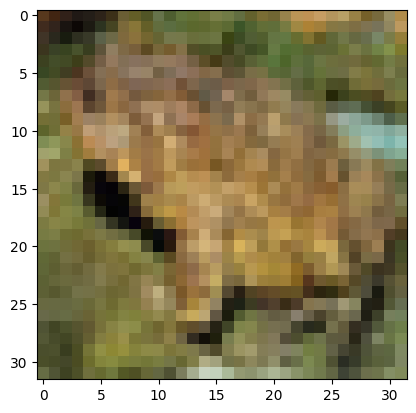


Correct Answer: car | Predicted: car


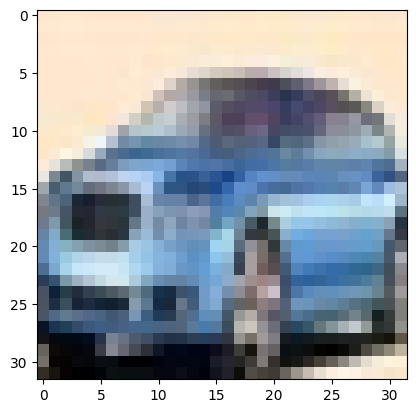


Batch 2:
---------------------------------------------
Correct Answer: dog | Predicted: dog


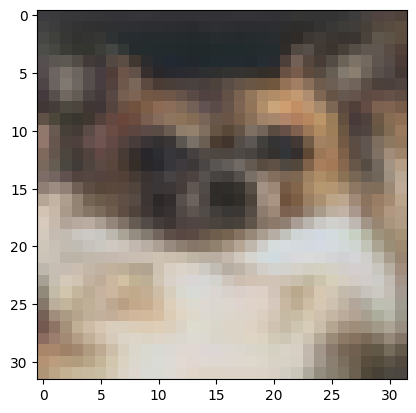


Correct Answer: dog | Predicted: dog


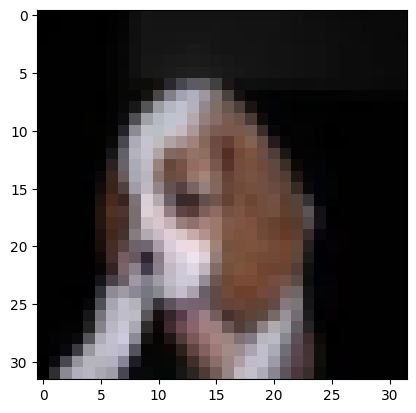


Correct Answer: truck | Predicted: bird


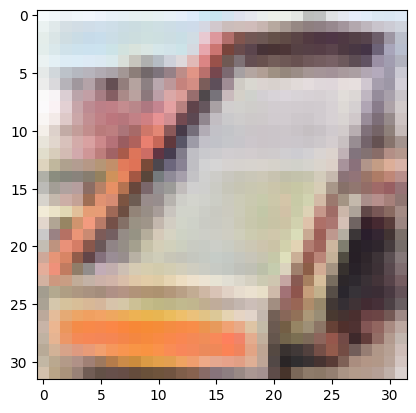


Correct Answer: frog | Predicted: frog


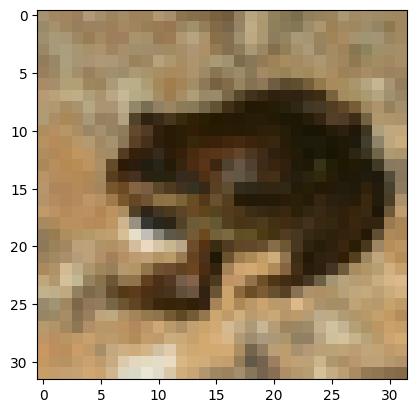


Correct Answer: deer | Predicted: deer


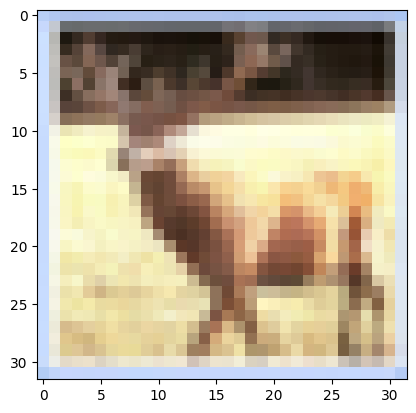


Correct Answer: horse | Predicted: horse


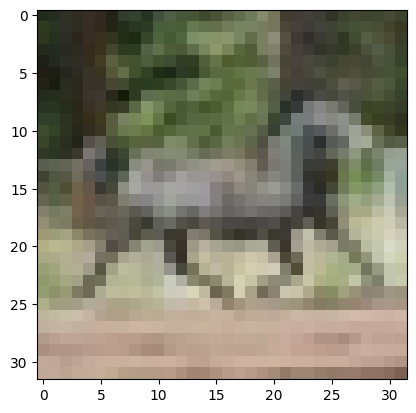


Correct Answer: car | Predicted: car


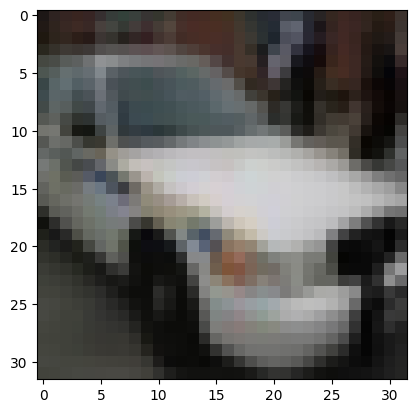


Correct Answer: horse | Predicted: deer


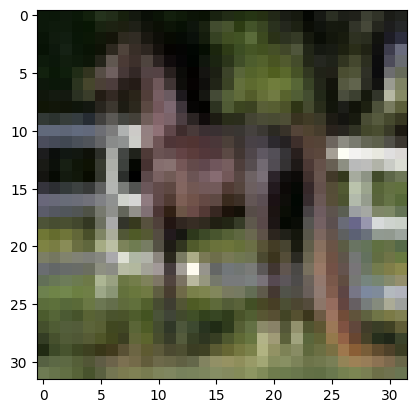


Batch 3:
---------------------------------------------
Correct Answer: horse | Predicted: horse


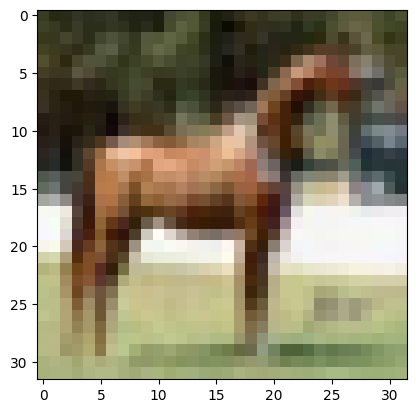


Correct Answer: plane | Predicted: plane


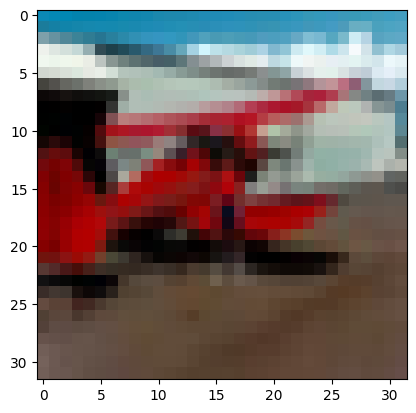


Correct Answer: frog | Predicted: bird


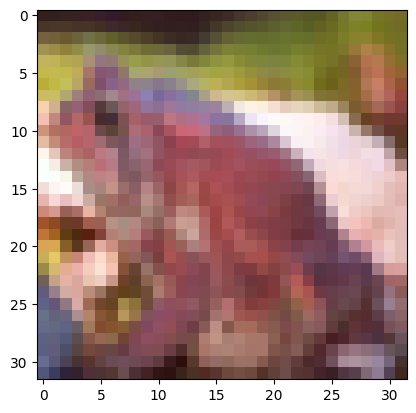


Correct Answer: horse | Predicted: horse


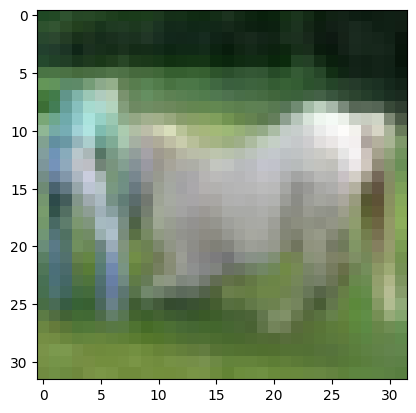


Correct Answer: plane | Predicted: plane


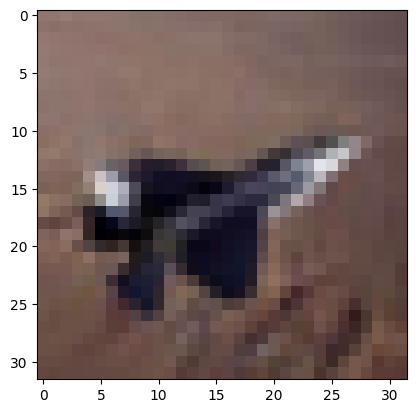


Correct Answer: dog | Predicted: deer


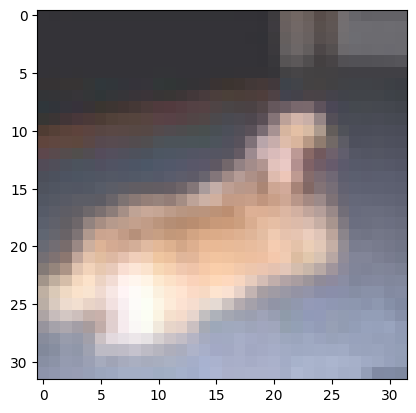


Correct Answer: dog | Predicted: dog


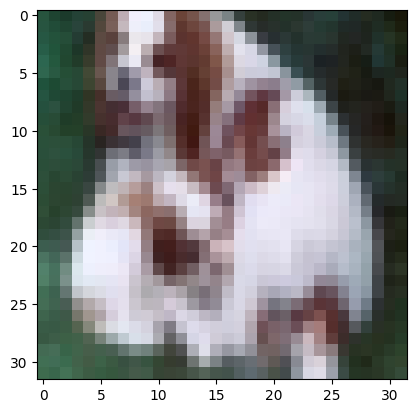


Correct Answer: deer | Predicted: deer


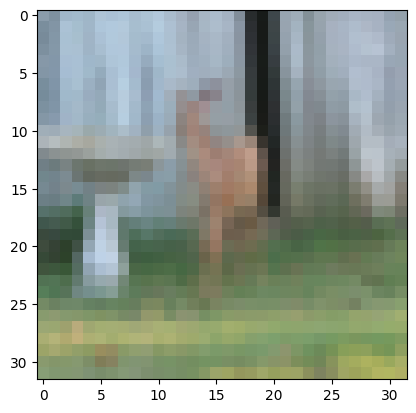

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
for i in range(3):
  print(f'Batch {i+1}:') # Batch 1 is pretty rough, it gets better over the other batches though.
  test_iter = iter(test_loader)
  test_images, test_labels = next(test_iter)
  print('---------------------------------------------')

  for i in range(len(test_images)):
    correct = 0
    image = test_images[i]
    label = test_labels[i]

    np_img = image.numpy()
    np_img = np.transpose(np_img,(1,2,0))
    np_img = np_img / 2 + 0.5

    plt.figure() # creates a new figure every image
    plt.imshow(np_img)

    # pass to model
    outputs = model(image.unsqueeze(0).to('cuda'))
    _, predicted = torch.max(outputs, 1)

    # print output
    print(f'Correct Answer: {classes[label]} | Predicted: {classes[predicted]}')
    plt.show()
    print()
    time.sleep(2.5)
